# Predicción de enfermedades cardiacas

## 1. Presentación:

Somos un equipo de trabajo conformado por estudiantes de Coderhouse.
 
El equipo se encuentra conformado por:<br>
- Omar Honigman
- Mayco Ñañez

💡<font color="cb1155"> Para facilitar la lectura, las interpretaciones se pondran en este color.</font>

### 1.1 Objetivos del trabajo:

Las enfermedades cardiovasculares son un conjunto de trastornos del corazón responsables de millones de fallecimientos al año.
Por lo tanto, queremos generar un modelo que permita pesquisar indicios de si los pacientes podrían tener complicaciones cardíacas, a los fines de que los pacientes reciban tratamientos para prevenir ataques cardíacos en relación a un rango etario y género.

### 1.2 Obtención de la información:
La data original fue recogida por "Centers of Disease Control and Prevention", e incluye información de los diferentes estados de Estados Unidos. Se encuentra en: https://www.cdc.gov/brfss/annual_data/annual_2020.html

Para la elaboración de este trabajo se ha utilizado la data revisada y publicada en kaggle por el usuario KAMIL PYTLAK.   
El link con los datos es el siguiente: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Cuenta con un archivo, "heart_2020_cleaned.csv", el cual contiene 319795 observaciones y 18 variables.

### 1.3 Descripción del dataset:

Variables:

1. **HeartDisease:** Indica si alguna vez ha reportado una enfermedad coronaria (CHD) o un infarto al miocardio (MI).
2. **BMI:** Índice de masa corporal. Utiliza la altura y peso de un individuo para calcular la grasa corporal y determinar el rango en el que se encuentra.
3. **Smoking:** Indica si el individuo ha fumado al menos 100 cigarrillos en su vida.
4. **AlcoholDrinking:** Si se ingiere más de 14 bebidas por semana en el caso de los hombres, o 7 bebidas a la semana en caso de las mujeres.
5. **Stroke:** Ha tenido alguna vez una Apoplejía.
6. **PhysicalHealth:** Durante los últimos 30 días, ¿cuántos días se ha sentido mal físicamente?
7. **MentalHealth:** Durante los últimos 30 días, ¿cuántos días se ha sentido mal mentalmente?
8. **DiffWalking:** Indica si tiene problemas serios para caminar o subir escaleras.
9. **Sex:** Indica si el paciente es Hombre (Male) o Mujer (Female).
10. **AgeCategory:** Indica en cuál de las categorías de edad se encuentra.
11. **Race:** Indica la raza del individuo. Las opciones son: 'White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic' y 'Other'.
12. **Diabetic:** ¿Alguna vez ha tenido diabetes? Las opciones son: 'Yes', 'No', 'No, borderline diabetes' y 'Yes (during pregnancy)'.
13. **PhysicalActivity:** Indica si realizar alguna actividad física, aparte de su trabajo diario.
14. **GenHealth:** En general que tan bien se salud se siente el individuo. Las opciones son: 'Poor', 'Fair', 'Good', 'Very good' y 'Excellent'.
15. **SleepTime:** En promedio, cuantas horas de sueño tiene el individuo en un periodo de 24 horas.
16. **Asthma:** ¿Alguna vez ha tenido asma?
17. **KidneyDisease:** ¿Alguna vez ha tenido enfermedades a los riñones?
18. **SkinCancer:** ¿Alguna vez ha tenido cáncer de piel?


***

## 2. Revisión del DataFrame

### 2.1 Importación de las librerías a usar:

In [25]:
# Para Manipulacion de datos:
import numpy as np
import pandas as pd
import scipy as sp

# Para visualizacion de datos:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Para Modelado:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Para Metricas:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

### 2.2 Creación del dataframe:

In [26]:
url = "https://raw.githubusercontent.com/OmarHonigman/Practicas_Data_Science/main/data_final.csv"
df = pd.read_csv(url)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 2.3 Caracteristicas:

In [27]:
print('\033[1m'+f"La data tiene {df.shape[0]} observaciones y {df.shape[1]} variables.")

La data tiene 319795 observaciones y 18 variables.


In [28]:
print('\033[1m'+f"Totalidad de registros por columnas:") 
df.count()

Totalidad de registros por columnas:


HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [29]:
print('\033[1m'+"Revision de datos faltantes:")
df.isnull().any()

Revision de datos faltantes:


HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

💡<font color="cb1155"> Se observa que no hay datos faltantes.</font>


In [30]:
print('\033[1m'+"Revision de las variables:")
df.columns

Revision de las variables:


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [31]:
print('\033[1m'+"Tipo de datos por columna:")
df.dtypes

Tipo de datos por columna:


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### 2.4 Principales características estadísticas de la data numérica:

In [32]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth','SleepTime']].T.style.background_gradient(cmap='PuRd')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


### 2.5 Distribución de frecuencias para SleepTime
SleepTime es una variable categórica que indica la cantidad de horas de sueño de las personas de la muestra. Realizaremos una distribución de frecuencias de forma manual para su revisión.

In [33]:
# Iniciamos creando el dataframe, con los datos de SleepTime, ordenados, y cambiando el nombre a Frecuencia Absoluta ("F_Abso")
HS_df = pd.DataFrame(df["SleepTime"].value_counts().sort_index())
HS_df.rename(columns = {"SleepTime":"F_Abso"}, inplace=True)
HS_df.head()

,F_Abso
1.0,551
2.0,788
3.0,1992
4.0,7750
5.0,19184


In [34]:
# Creamos la columna de Frecuencias Absolutas Acumuladas ("F_Abso_Acu").
valores = HS_df["F_Abso"].values
acumulada = []
valor = 0
for x in valores:
    valor = valor + x
    acumulada.append(valor)
    
HS_df["F_Abso_Acu"] = acumulada
HS_df.head()

,F_Abso,F_Abso_Acu
1.0,551,551
2.0,788,1339
3.0,1992,3331
4.0,7750,11081
5.0,19184,30265


In [35]:
# Agregamos la columna de Frecuencia relativa ("F_Rel_%")
HS_df["F_Rel_%"] = 100 * HS_df["F_Abso"]/len(df.SleepTime)
HS_df.head()

,F_Abso,F_Abso_Acu,F_Rel_%
1.0,551,551,0.172298
2.0,788,1339,0.246408
3.0,1992,3331,0.622899
4.0,7750,11081,2.423428
5.0,19184,30265,5.998843


In [36]:
# Agregamos la Frecuencia Relativa Acumulada ("F_Rel_%_Acu")
valores2 = HS_df["F_Rel_%"].values
acumulada2 = []
valor2 = 0
for x in valores2:
    valor2 = valor2 + x
    acumulada2.append(valor2)
    
HS_df["F_Rel_%_Acu"] = acumulada2

In [37]:
# Finalmente visualizamos la tabla completa
HS_df

,F_Abso,F_Abso_Acu,F_Rel_%,F_Rel_%_Acu
1.0,551,551,0.172298,0.172298
2.0,788,1339,0.246408,0.418706
3.0,1992,3331,0.622899,1.041605
4.0,7750,11081,2.423428,3.465032
5.0,19184,30265,5.998843,9.463875
6.0,66721,96986,20.863678,30.327554
7.0,97751,194737,30.566769,60.894323
8.0,97602,292339,30.520177,91.414500
9.0,16041,308380,5.016026,96.430526
10.0,7796,316176,2.437812,98.868338


**Veamos los TOP 5 & BOTTOM 5**

In [38]:
HS_df.sort_values(by="F_Rel_%", ascending=False).head()

,F_Abso,F_Abso_Acu,F_Rel_%,F_Rel_%_Acu
7.0,97751,194737,30.566769,60.894323
8.0,97602,292339,30.520177,91.414500
6.0,66721,96986,20.863678,30.327554
5.0,19184,30265,5.998843,9.463875
9.0,16041,308380,5.016026,96.430526


In [39]:
HS_df.sort_values(by="F_Rel_%", ascending=True).head()

,F_Abso,F_Abso_Acu,F_Rel_%,F_Rel_%_Acu
21.0,2,319753,0.000625,99.986867
19.0,3,319687,0.000938,99.966228
23.0,3,319765,0.000938,99.990619
22.0,9,319762,0.002814,99.989681
17.0,21,319582,0.006567,99.933395


💡 <font color="cb1155">
Podemos observar que las horas de sueño más comunes van desde 5 a 9 horas. Por otra parte, también tenemos muestras que indican horas de sueño mayores a 20 horas. Esto podría considerarse como Outliers, sin embargo, existen condiciones de salud que podrían causar esta cantidad de horas de sueño, pero no tenemos esa información.
</font>


### 2.6 Cambios en el dataframe
Se realizarán cambios al valor de algunas variables para poder realizar su entrenamiento. Crearemos un nuevo dataframe que guarde todos los cambios.<br>
* Usaremos LabelEncoder para cambiar las variables binarias, 

In [40]:
df_clean = df.copy()
for columna in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    label = LabelEncoder()
    df_clean[columna] = label.fit_transform(df[columna])

* Usaremos One-hot encode para las variables con múltiples valores únicos.

In [41]:
df_clean = pd.get_dummies(df_clean, columns=['Race', 'GenHealth' , "AgeCategory"], prefix = ['Race: ', 'GenHealth: ', "Age_Category: "], prefix_sep = "")

* Para la Diabetes, haremos un cambio especial. Para este análisis nos interesa saber si cualquier caso de Diabetes afecta a la probabilidad de sufrir enfermedades cardiacas. Por ello convertiremos las opciones: <br> **“No, borderline diabetes”** y **“Yes (during pregnancy)”** a **“Yes”.**

In [42]:
df_clean["Diabetic"] = df_clean["Diabetic"].replace({"No": 0, "No, borderline diabetes": 1,"Yes (during pregnancy)": 1,"Yes": 1})

In [43]:
df_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Age_Category: 35-39,Age_Category: 40-44,Age_Category: 45-49,Age_Category: 50-54,Age_Category: 55-59,Age_Category: 60-64,Age_Category: 65-69,Age_Category: 70-74,Age_Category: 75-79,Age_Category: 80 or older
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [44]:
df_clean.nunique()

HeartDisease                               2
BMI                                     3604
Smoking                                    2
AlcoholDrinking                            2
Stroke                                     2
PhysicalHealth                            31
MentalHealth                              31
DiffWalking                                2
Sex                                        2
Diabetic                                   2
PhysicalActivity                           2
SleepTime                                 24
Asthma                                     2
KidneyDisease                              2
SkinCancer                                 2
Race: American Indian/Alaskan Native       2
Race: Asian                                2
Race: Black                                2
Race: Hispanic                             2
Race: Other                                2
Race: White                                2
GenHealth: Excellent                       2
GenHealth:

***

## 3. Análisis Exploratorio

### 3.1 Gráficos de las variables binarias

Revisemos cada variable en su totalidad y también como se comporta cuando solo se presentan enfermedades cardiacas.

#### 3.1.1 Fumadores

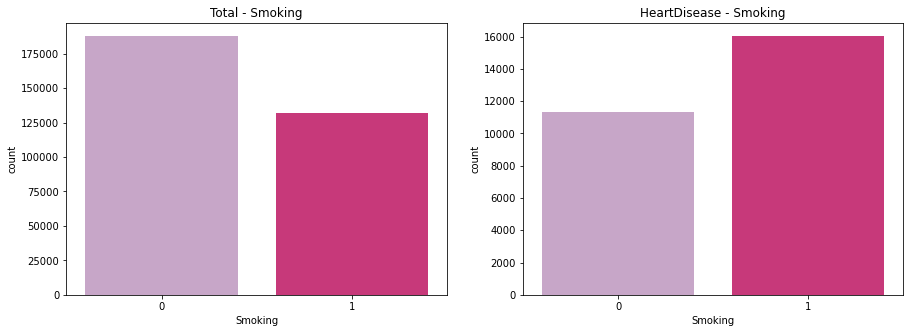

In [45]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["Smoking"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - Smoking')

sns.countplot(data = df_clean, x = df_clean["Smoking"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - Smoking')

plt.show()

💡 <font color="cb1155">En los casos de “HeartDisease”, se observa una mayoría fumadora.

#### 3.1.2 Bebedores

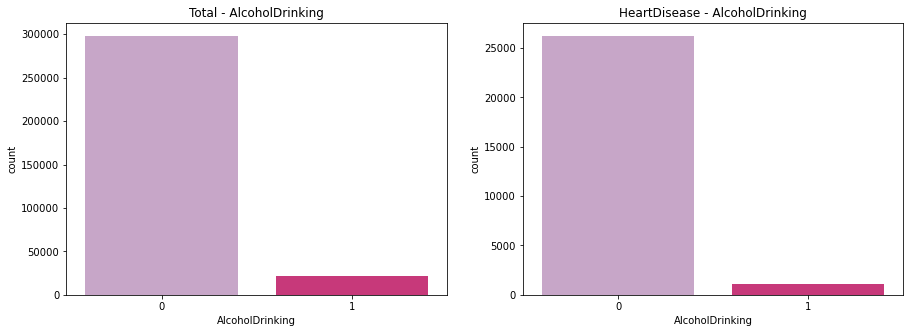

In [46]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["AlcoholDrinking"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - AlcoholDrinking')

sns.countplot(data = df_clean, x = df_clean["AlcoholDrinking"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - AlcoholDrinking')

plt.show()

💡 <font color="cb1155">No parece haber una relación de los bebedores con la posibilidad de contraer alguna enfermedad cardiaca. 

#### 3.1.3 Sexo

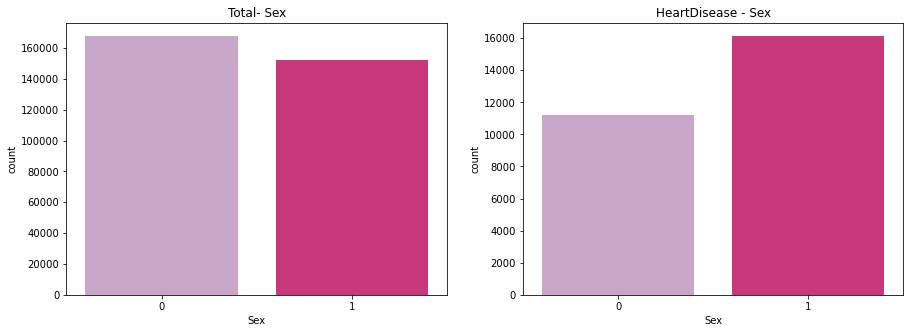

In [47]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["Sex"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total- Sex')

sns.countplot(data = df_clean, x = df_clean["Sex"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - Sex')

plt.show()

💡 <font color="cb1155">Llama la atención que a pesar que en el total de los pacientes la mayoría son mujeres, si solo consideramos a los pacientes con problemas cardiacos, se observa una mayor predominancia de los pacientes masculinos.

#### 3.1.4 Dificultad para caminar

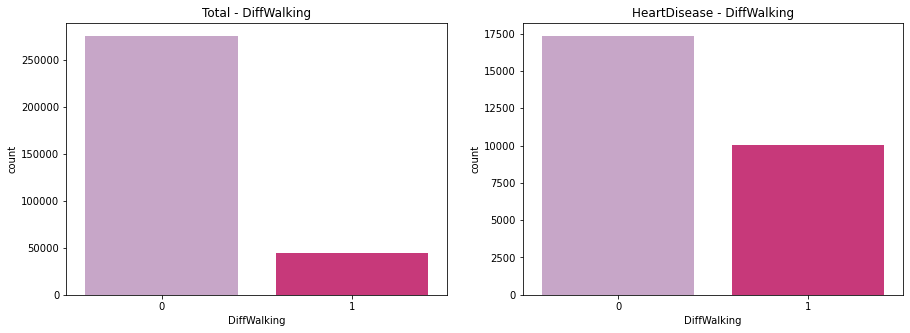

In [48]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["DiffWalking"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - DiffWalking')

sns.countplot(data = df_clean, x = df_clean["DiffWalking"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - DiffWalking')

plt.show()

💡 <font color="cb1155"> Un porcentaje de los pacientes con problemas cardiacos, indica también problemas para caminar / subir escaleras.

#### 3.1.5 Apoplejía

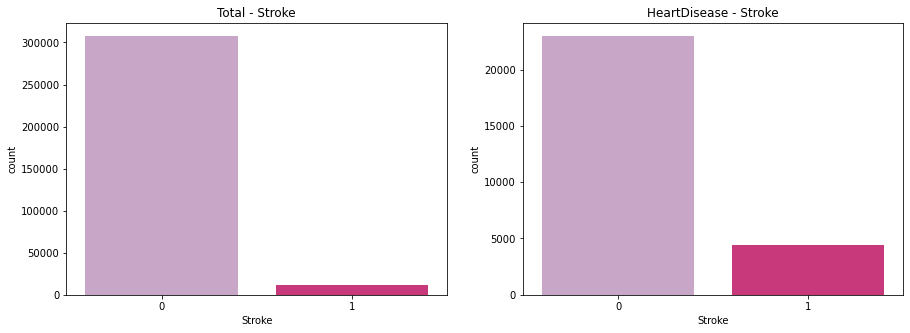

In [49]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["Stroke"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - Stroke')

sns.countplot(data = df_clean, x = df_clean["Stroke"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - Stroke')

plt.show()

💡 <font color="cb1155">No parece haber una relación de los pacientes que alguna vez sufrieron una apoplejía con la posibilidad de contraer alguna enfermedad cardiaca.

#### 3.1.6 Asma

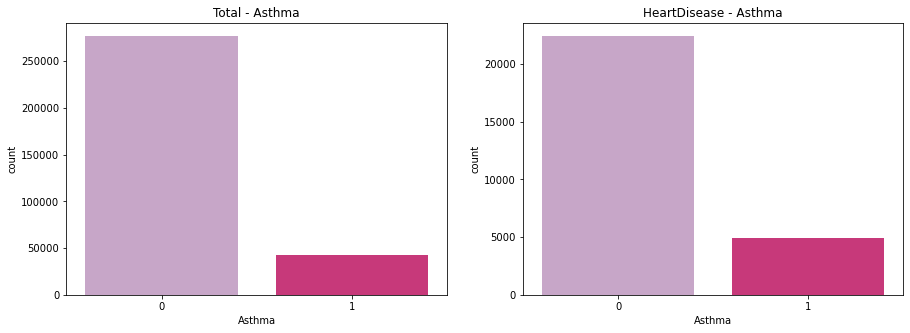

In [50]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["Asthma"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - Asthma')

sns.countplot(data = df_clean, x = df_clean["Asthma"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - Asthma')

plt.show()

💡 <font color="cb1155">No parece haber una relación de los pacientes que alguna vez tuvieron asma con la posibilidad de contraer alguna enfermedad cardiaca.

#### 3.1.7 Enfermedades renales

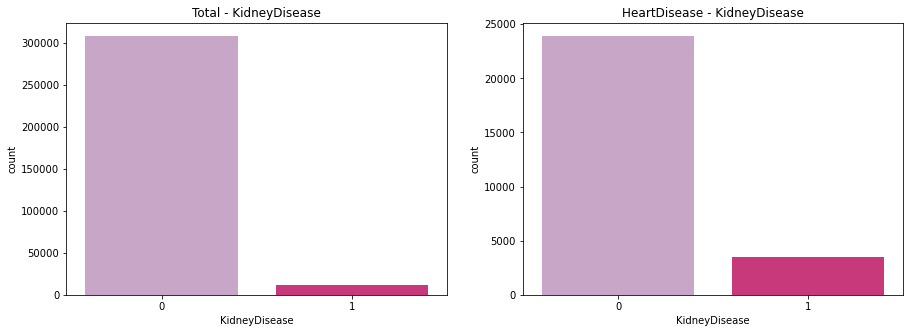

In [51]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["KidneyDisease"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - KidneyDisease')

sns.countplot(data = df_clean, x = df_clean["KidneyDisease"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - KidneyDisease')

plt.show()

💡 <font color="cb1155">No parece haber una relación de los pacientes que alguna vez tuvieron problemas renales con la posibilidad de contraer alguna enfermedad cardiaca.

#### 3.1.8 Cáncer de piel

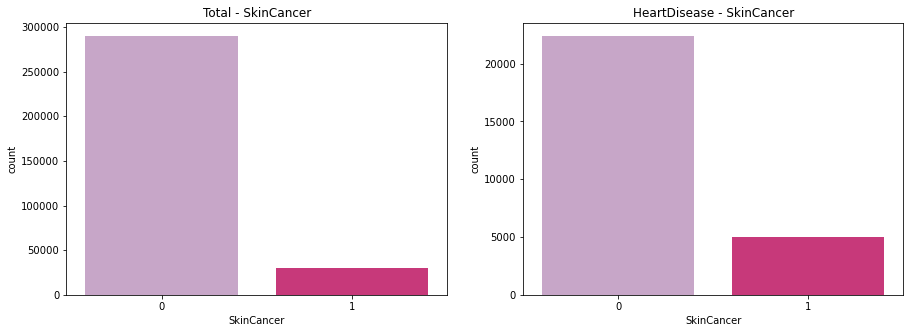

In [52]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["SkinCancer"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - SkinCancer')

sns.countplot(data = df_clean, x = df_clean["SkinCancer"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - SkinCancer')

plt.show()

💡 <font color="cb1155">No parece haber una relación de los pacientes que alguna vez padecieron de cáncer de piel con la posibilidad de contraer alguna enfermedad cardiaca.

#### 3.1.9 Diabetes

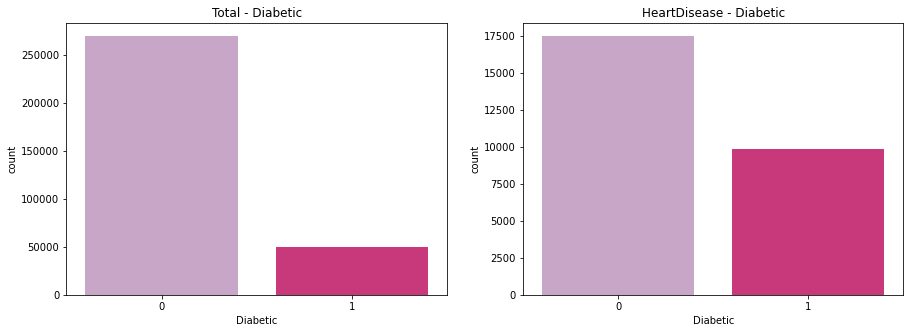

In [53]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = df_clean["Diabetic"].sort_values(), ax=ax[0], palette="PuRd")
ax[0].set(title='Total - Diabetic')

sns.countplot(data = df_clean, x = df_clean["Diabetic"][df_clean["HeartDisease"] == 1].sort_values(), ax=ax[1], palette="PuRd")
ax[1].set(title='HeartDisease - Diabetic')

plt.show()

💡 <font color="cb1155">Parece haber una pequeña relación entre los pacientes que alguna vez sufrieron de algún tipo de diabetes, y los problemas cardiacos.

#### 3.1.10 Edad

Text(0, 0.5, 'Cantidad')

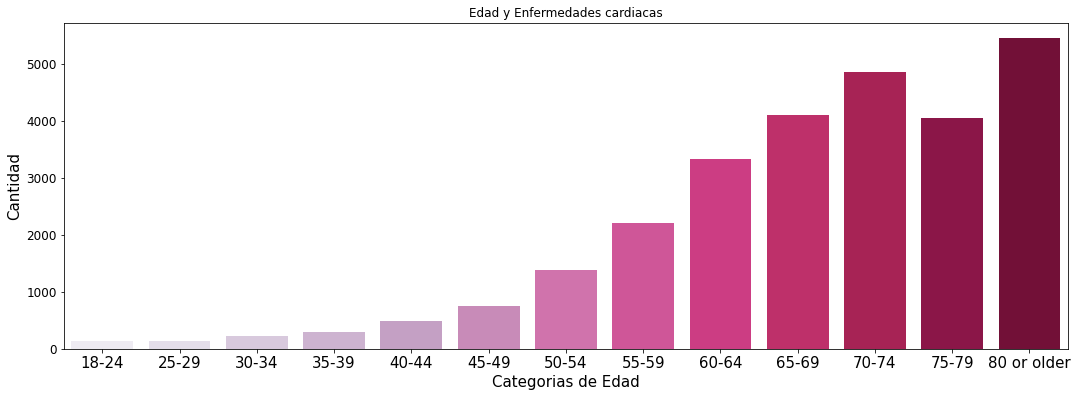

In [54]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data = df, x = df["AgeCategory"][df["HeartDisease"] == "Yes"], order = df['AgeCategory'].value_counts().index.sort_values(), palette="PuRd")
ax.set(title='Edad y Enfermedades cardiacas')
plt.xticks(size = 15)
plt.xlabel("Categorias de Edad", size = 15)
plt.yticks(size = 12)
plt.ylabel("Cantidad", size = 15)


💡 <font color="cb1155"> Observamos que la mayoría de los pacientes con problemas cardiacos se encuentran desde los 60 años a más.

### 3.2 Heatmap

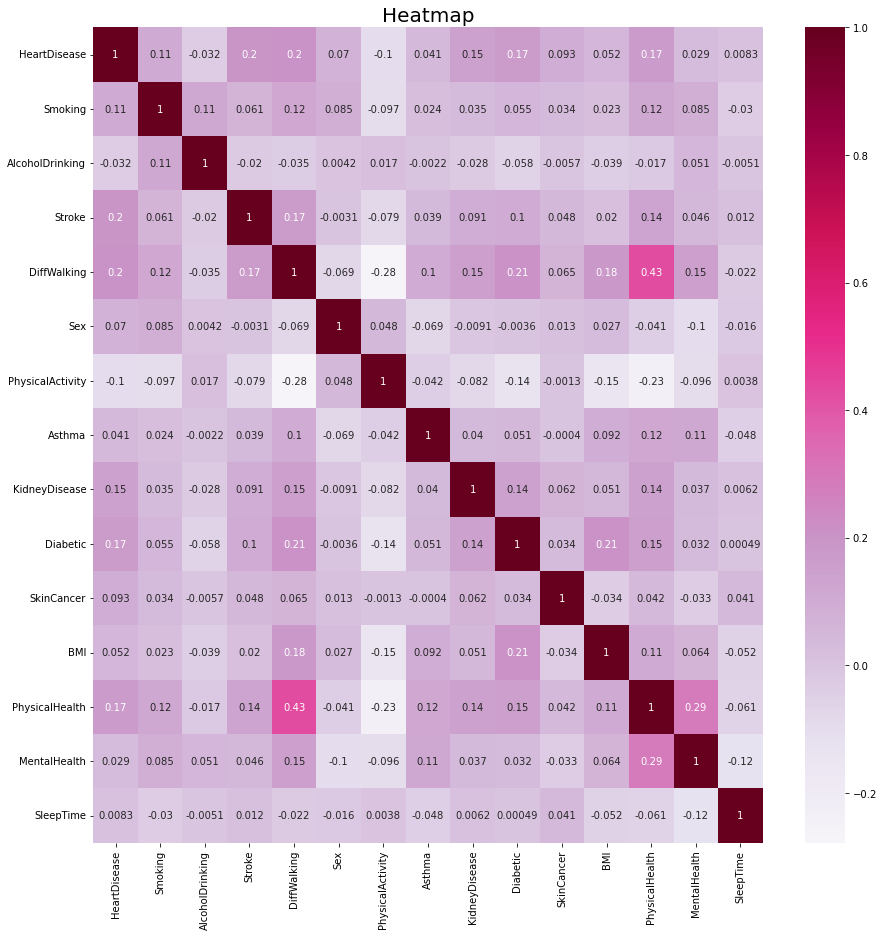

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(df_clean[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', "Diabetic", 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'SleepTime']].corr(), annot = True, cmap = 'PuRd')
plt.title('Heatmap', fontsize = 20)
plt.show()

## 4. Storytelling:


Remitiendonos al gráfico del punto 3.1.10 (Edad) hallamos una correlación directa entre las variables "rango etario" y "ataques cardiacos". Así mismo, hemos notado que aunque la mayoría de personas de nuestro muestreo corresponden al género femenino, las enfermedades se dan en un mayor porcentaje en pacientes de género masculino. Lo que nos hace cuestionarnos es:
- ¿Existe una relación directa entre el género masculino y la posibilidad de contraer una enfermedad coronaria?
- ¿Hay alguna característica racial que nos predisponga a contraerla?¿Existe una relación directa entre el consumo del alcohol y tabaco con la predisposición a contraer dicha enfermedad?. 
- La correlación hallada entre la propensión a contraer enfermedades cardíacas y el género masculino, ¿Es una relación interpelada por la culturalidad?

## 5. Solución al desbalance de la TARGET

Revisemos primero nuestra variable target:

In [56]:
rev = pd.DataFrame(df_clean["HeartDisease"].value_counts())
rev["%"] = round((rev["HeartDisease"]*100)/rev["HeartDisease"].sum(), 2)
rev

,HeartDisease,%
0,292422,91.44
1,27373,8.56


El 91.44% de los datos de nuestra target, indican que no tienen enfermedades cardíacas, lo que indica que estamos ante un caso de datos desbalanceados. Por lo que antes de realizar los modelos, deberemos encontrar la mejor manera de solucionar el desbalance.

### 5.1 Árbol de decisión
Para poder comparar resultados, iniciaremos realizando el modelado con la data desbalanceada, utilizando arboles de decisión.

#### 5.1.1 Creación del Modelo

In [57]:
X = df_clean.drop("HeartDisease", axis=1) 
y = df_clean.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25) 

In [58]:
arbol_de_decision = DecisionTreeClassifier(max_depth=5, random_state = 25)
arbol_de_decision.fit(X_train,y_train)

y_train_pred = arbol_de_decision.predict(X_train)
y_test_pred = arbol_de_decision.predict(X_test)

In [59]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9163971481666786
% de aciertos sobre el set de evaluación: 0.9139870125809108


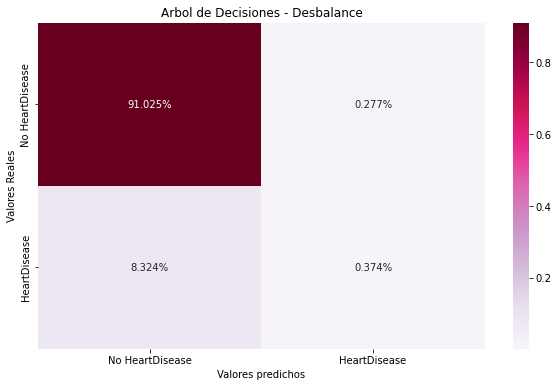

In [60]:
plt.figure(figsize=(10,6))
cm  = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.3%')

ax.set_title('Arbol de Decisiones - Desbalance')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores Reales')
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

💡 <font color="cb1155">Como sospechabamos, a pesar de obtener una precision del 91.4%, al revisar la matriz de confusion, observamos claramente que el modelo mayormente esta prediciendo con un NO ("0").

### 5.2 Subsampling de la clase mayoritaria
Lo primero que intentaremos es reducir la clase mayoritaria que tiene 292422 observaciones, para que sea un poco mas cercana a la clase minoritaria que tiene 27373 observaciones.

In [61]:
X = df_clean.drop('HeartDisease',axis=1)
y = df_clean['HeartDisease']

rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X,y)
y_under.value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.30, random_state=25) 

In [63]:
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 25)
arbol_de_decision.fit(X_train,y_train)

y_train_pred = arbol_de_decision.predict(X_train)
y_test_pred = arbol_de_decision.predict(X_test)

In [64]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.68461980063671
% de aciertos sobre el set de evaluación: 0.6850949829517778


💡 <font color="cb1155">El SubSampling nos da mejores resultados, sin embargo, estaríamos eliminando mucha información.

### 5.3 Oversampling de la clase minoritaria
Otra opción, es el OverSampling, lo que significa crear data sintética teniendo en cuenta las características de nuestra Target, de forma que se pueda balancear.

In [65]:
X = df_clean.drop('HeartDisease',axis=1)
y = df_clean['HeartDisease']

ros = RandomOverSampler(random_state=25)
X_over, y_over = ros.fit_resample(X,y)
y_over.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.30, random_state=25) 

In [67]:
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 25)
arbol_de_decision.fit(X_train,y_train)

y_train_pred = arbol_de_decision.predict(X_train)
y_test_pred = arbol_de_decision.predict(X_test)

In [68]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7046605925889738
% de aciertos sobre el set de evaluación: 0.7043954540791318


💡 <font color="cb1155">Si bien solo obtenemos una mejora pequeña al utiliza el OverSampling, vamos a usar este método principalmente porque no perderemos datos.

***

## 6. Selección de Algoritmo

### 6.1 Separación en X e y
Hemos decidido utilizar OverSampling para manejar el desbalance, por lo que separaremos la data en X e y. <br>
💡 <font color="cb1155">Tambien es importante considerar que solo debemos hacer un OverSampling a la data de “train”, y no a la “test”, ya que esto puede ocacionar Overfitting. De igual manera, un OverSampling del “test”, no estaría reflejando el porcentaje real de muestras de enfermedades cardiacas.

In [69]:
# Definimos X e y:
X = df_clean.drop('HeartDisease',axis=1)
y = df_clean['HeartDisease']

In [70]:
# Usaremos "train_test_split" para separar la data de train y test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25) 

In [71]:
# Aplicaremos RandomOverSampler a X_train e y_train:
ros = RandomOverSampler(random_state=25)
X_over, y_over = ros.fit_resample(X_train, y_train)

In [72]:
# Revisemos los datos a usar:
y_over.value_counts(), y_test.value_counts()

(0    204828
 1    204828
 Name: HeartDisease, dtype: int64,
 0    87594
 1     8345
 Name: HeartDisease, dtype: int64)

In [73]:
# Renombremos las variables de entrenamiento:
X_train = X_over 
y_train = y_over

### 6.2 Modelos

Probemos diferentes modelos de clasificación:

#### 6.2.1 K-Nearest-Neighbor

In [74]:
# Creación del Modelo
knn = KNeighborsClassifier(n_neighbors=3)
# Entrenamiento del Modelo
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
# Predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [76]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9635206124162712
% de aciertos sobre el set de evaluación: 0.8334254057265554


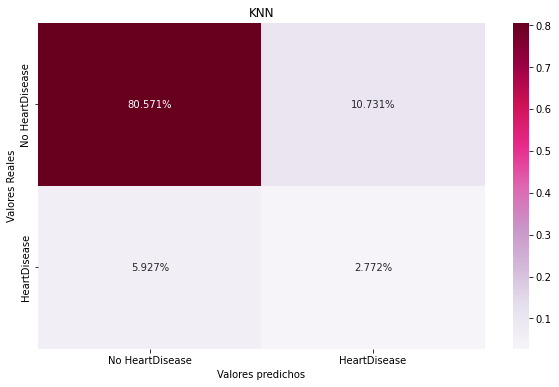

In [77]:
plt.figure(figsize=(10,6))
cm  = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.3%')

ax.set_title('KNN')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores Reales')
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

In [78]:
# Elaboracion de metricas
KNN = [accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]

#### 6.2.2 Arboles de decisión 

In [79]:
# Creación del Modelo
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 25)

# Entrenamiento del Modelo
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=25)

In [80]:
# Predicciones
y_train_pred = arbol_de_decision.predict(X_train)
y_test_pred = arbol_de_decision.predict(X_test)

In [81]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6918853867635284
% de aciertos sobre el set de evaluación: 0.7339246813079144


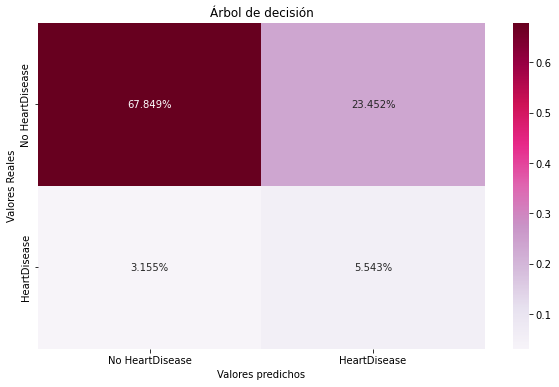

In [82]:
plt.figure(figsize=(10,6))
cm  = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.3%')

ax.set_title('Árbol de decisión')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores Reales')
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

In [83]:
# Elaboracion de metricas
Arbol = [accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]

#### 6.2.3 Random Forest

In [84]:
# Creación del Modelo
random_forest = RandomForestClassifier(random_state=11, n_estimators=100, class_weight="balanced", max_features="log2")

# Entrenamiento del Modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=11)

In [85]:
# Predicciones
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [86]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.997668775753315
% de aciertos sobre el set de evaluación: 0.8870532317410021


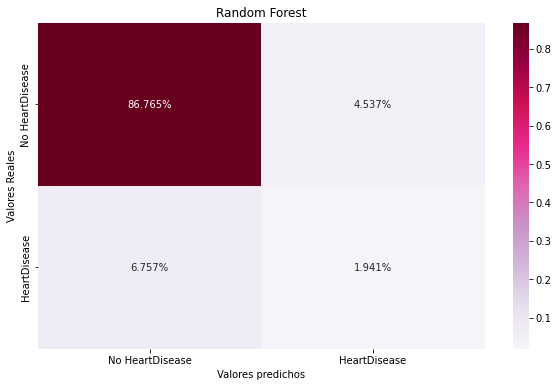

In [87]:
plt.figure(figsize=(10,6))
cm  = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.3%')

ax.set_title('Random Forest')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores Reales')
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

In [88]:
# Elaboracion de metricas
Ran_Forest = [accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]

## 7. Evaluación de desempeño

### 7.1 Metricas

In [89]:
metricas = ["Accuracy", "Precision", "Recall", "Score F1"]

metrics = pd.DataFrame(index= metricas)
metrics["KNN"] = KNN
metrics["Arbol"] = Arbol
metrics["R_Forest"] = Ran_Forest
metrics.round(4)

,KNN,Arbol,R_Forest
Accuracy,0.8334,0.7339,0.8871
Precision,0.2053,0.1912,0.2996
Recall,0.3186,0.6373,0.2231
Score F1,0.2497,0.2941,0.2558


💡 <font color="cb1155"> En nuestros tres modelos obtenemos buenos porcentajes de accuracy, sin embargo, el recall, la precisión y el F1_Score son bajos.

### 7.2 Área bajo la curva ROC

AUC: 0.7407883453199084


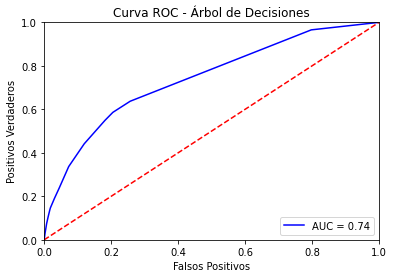

In [90]:
class_probabilities = arbol_de_decision.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

plt.title('Curva ROC - Árbol de Decisiones')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Positivos Verdaderos')
plt.xlabel('Falsos Positivos')
plt.show()

💡 <font color="cb1155"> El AUC de nuestro modelo es de 0.74, lo que indica que es regular.

## 8. Mejora de modelo

Dado que nuestra data es medica, la metrica mas importante para nosotros es el Recall. Es mas importante que se predigan 
Iniciemos la mejora de nuestros modelos, afinando la data.

### 8.1 ¿Cuáles son las variables más importantes?

Hasta el momento nuestros mejores resultados en recall nos los ha dado el árbol de decisiones. Trabajaremos con él para encontrar las variables más importantes.

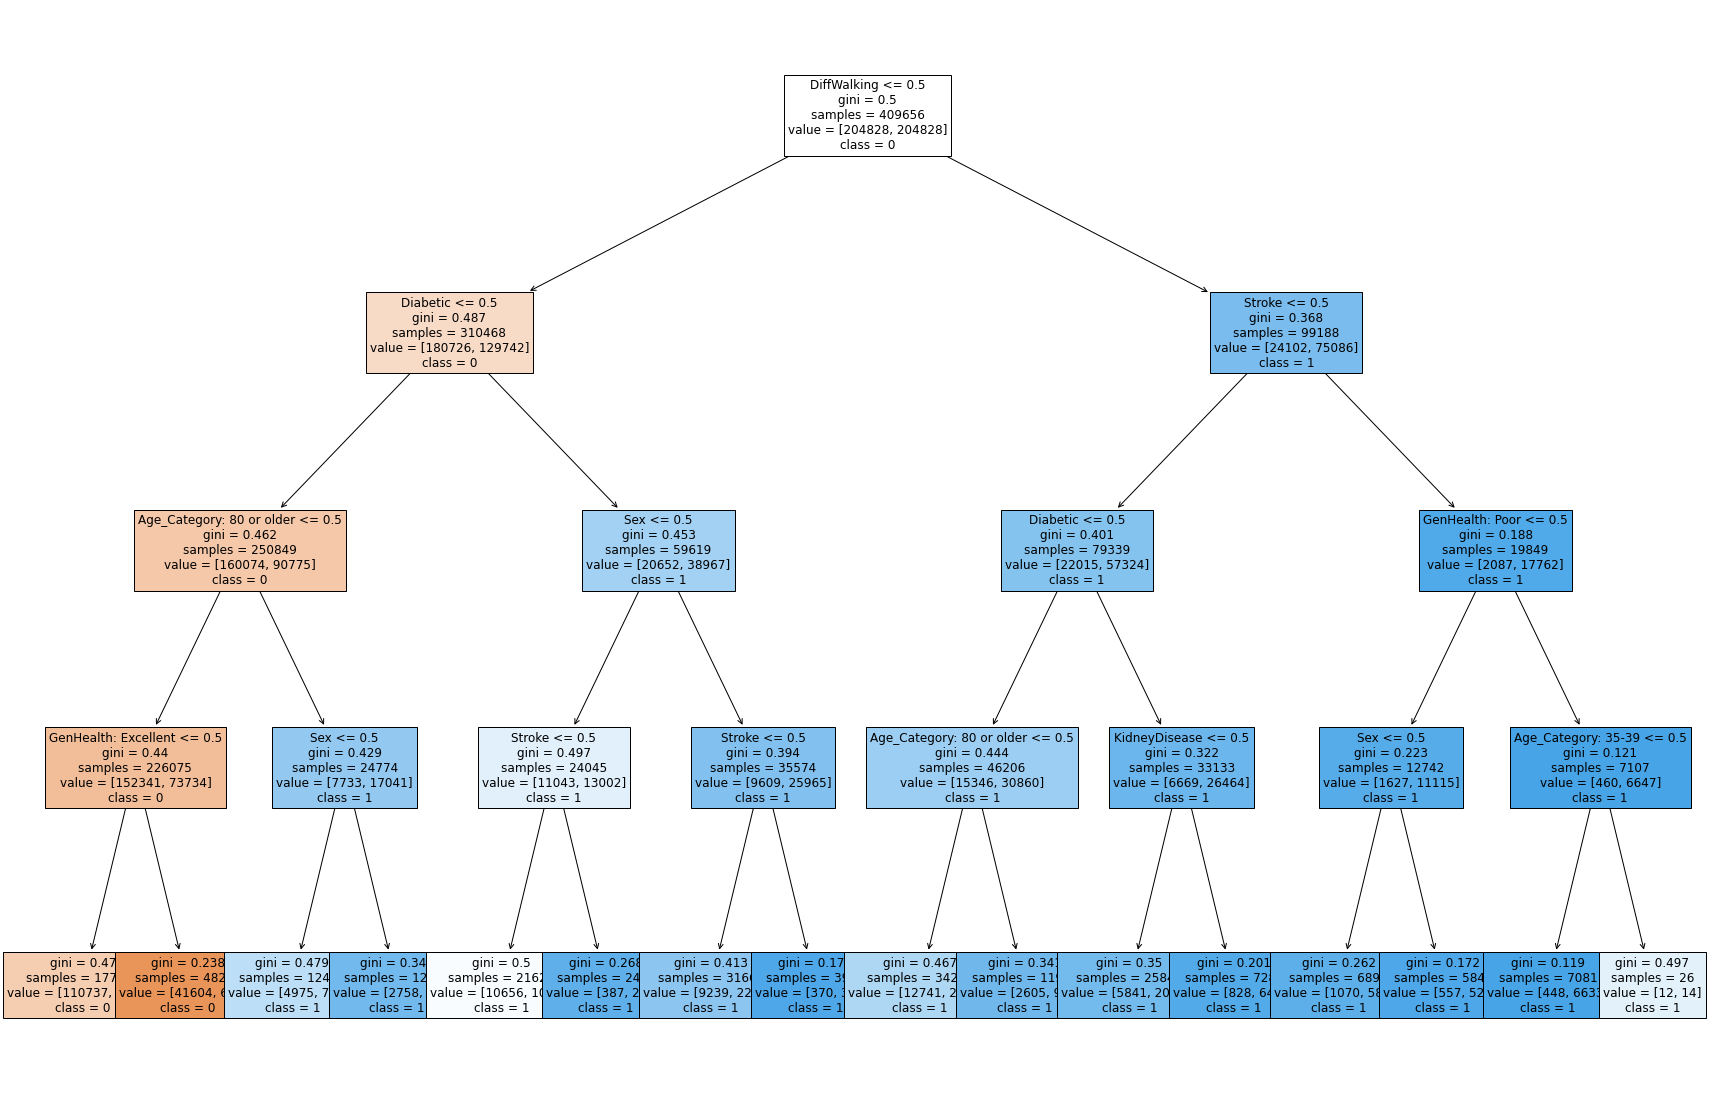

In [91]:
plt.figure(figsize=(30,20))
tree.plot_tree(arbol_de_decision, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=12)
plt.show()

💡 <font color="cb1155"> Podemos observar que la dificultad para caminar, es la primera opción para el árbol de decisiones.

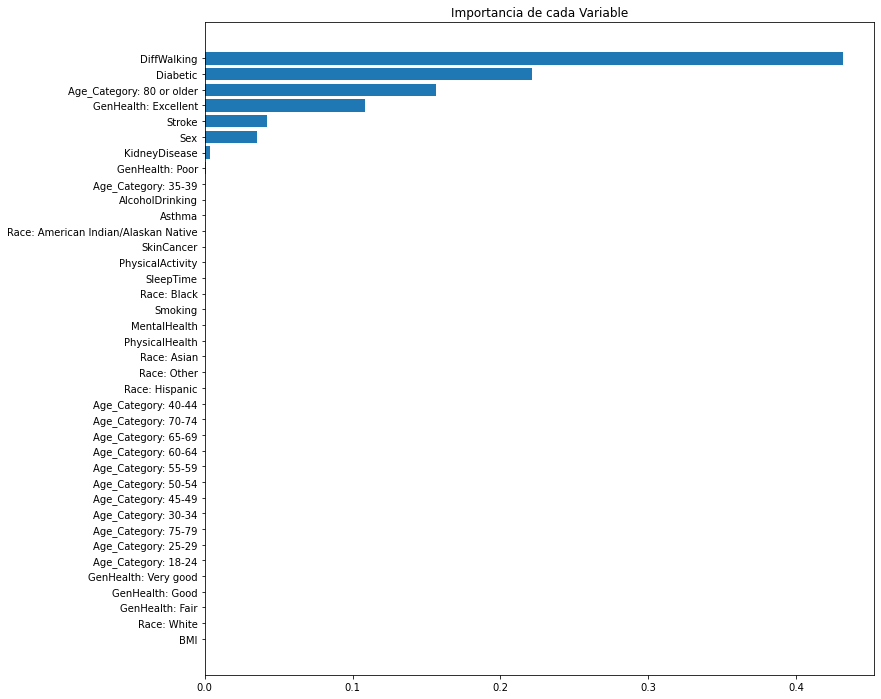

In [92]:
orden = arbol_de_decision.feature_importances_.argsort()
variables = X.columns[orden]
plt.figure(figsize=(12,12))
plt.barh(variables, arbol_de_decision.feature_importances_[orden])
plt.title('Importancia de cada Variable')
plt.show()

💡 <font color="cb1155"> Efectivamente, Dificultad para caminar se muestra como la variable mas importante. Otras variables como Diabetes, Mayor a 80 años, Salud Excelente y el Sexo, también son importantes.

### 8.2 Estadarizacion y PCA

Intentaremos mejorar el modelo, y para ello aplicaremos la estandarizacion a las variables, asi como tambien buscaremos el PCA (Analisis de componentes principales).

In [93]:
# Prepararemos una vez mas los valores de X e y
X = df_clean.drop('HeartDisease',axis=1)
y = df_clean['HeartDisease']

In [94]:
# Usamos el escalamiento estandar para los valores de X
X_standard = StandardScaler().fit_transform(X)

# Apliquemos PCA a los valores de X
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_standard)

print('Tamaño de la muestra antes de aplicar PCA:',X.shape)
print('Tamaño de la muestra después de aplicar PCA:',X_pca.shape)

Tamaño de la muestra antes de aplicar PCA: (319795, 38)
Tamaño de la muestra después de aplicar PCA: (319795, 29)


In [95]:
varianza = pca.explained_variance_ratio_
print('suma:',sum(varianza[0:29]))

suma: 0.9017873987919631


💡 <font color="cb1155"> Aplicamos PCA manteniendo el 90% de la información, lo que nos permite reducir nuestras variables de 38 a 29. 

### 8.3 Optimización de hiperparametros

Buscaremos cuales son los mejores hiperparametros para el modelo de árbol de decisiones.

In [ ]:
# Usaremos "train_test_split" para separar la data de train y test, considerando los datos obtenidos despues de aplicar PCA:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=25) 

In [ ]:
# Aplicaremos RandomOverSampler a X_train e y_train:
ros = RandomOverSampler(random_state=25)
X_over, y_over = ros.fit_resample(X_train, y_train)

# Renombremos las variables de entrenamiento:
X_train = X_over 
y_train = y_over

#### 8.3.1 StratifiedKFold

Usaremos StratifiedKFold para validar los resultados y mantener las clases equilibradas.

In [97]:
cv_HeartDisease = StratifiedKFold(n_splits=5, random_state=25, shuffle=True)

#### 8.3.2 GridSearchCV

Debido al tamaño de nuestra data, y a la cantidad de variables que tenemos, usaremos GridSearchCV, para buscar los parámetros para nuestro árbol de decisiones.

In [ ]:
arbol_de_decision = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
              'splitter': ['best','random'],
              'max_leaf_nodes':np.arange(2,29)}

model= GridSearchCV(arbol_de_decision, param_grid=param_grid, error_score='raise', cv=cv_HeartDisease)

#Entrenamos nuestro modelo
model.fit(X_train, y_train)

#Vemos cuales serían los mejores parametros
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

💡<font color="cb1155"> Mejores parametros : 'criterion': 'gini',   'max_leaf_nodes': 28, 'splitter': 'best' <br>
💡<font color="cb1155"> Mejor Score: 0.7508

### 8.4 Arbol de Decisiones

In [98]:
# Entrenamiento del modelo 
arbol_final = GridSearchCV(estimator=arbol_de_decision, param_grid={'criterion':['gini'], 'max_leaf_nodes':[28], 'splitter':['best']}, error_score='raise', cv=cv_HeartDisease)
arbol_final.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=25, shuffle=True),
             error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=4, random_state=25),
             param_grid={'criterion': ['gini'], 'max_leaf_nodes': [28],
                         'splitter': ['best']})

In [99]:
# Predicciones
y_train_pred = arbol_final.predict(X_train)
y_test_pred = arbol_final.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6918853867635284
% de aciertos sobre el set de evaluación: 0.7339246813079144


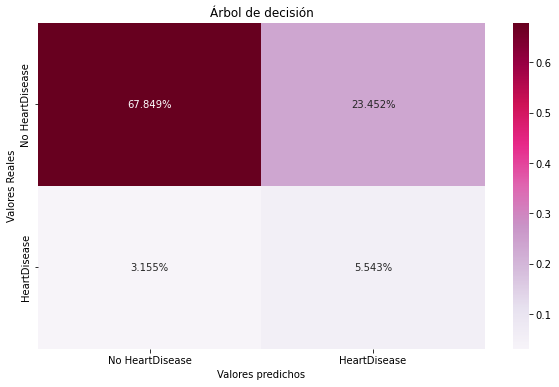

In [100]:
plt.figure(figsize=(10,6))
cm  = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.3%')

ax.set_title('Árbol de decisión')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores Reales')
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

In [101]:
# Elaboracion de metricas
Arbol_final = [accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]

AUC: 0.7407883453199084


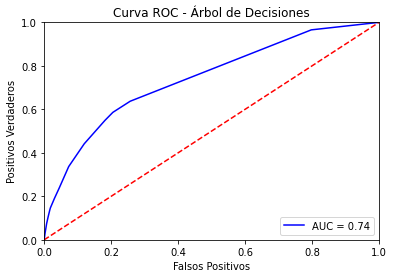

In [102]:
class_probabilities = arbol_final.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

plt.title('Curva ROC - Árbol de Decisiones')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Positivos Verdaderos')
plt.xlabel('Falsos Positivos')
plt.show()

### 8.5 Random Forest

Intentaremos usar los hiperparametros que obtuvimos del árbol de decisiones, para entrenar nuevamente el modelo de Random Forest.

In [103]:
# Creación del Modelo
random_forest = RandomForestClassifier(random_state=11, n_estimators=100, class_weight="balanced", max_features=28, criterion= 'gini')

# Entrenamiento del Modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=28,
                       random_state=11)

In [104]:
# Predicciones
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.997668775753315
% de aciertos sobre el set de evaluación: 0.8857711670957588


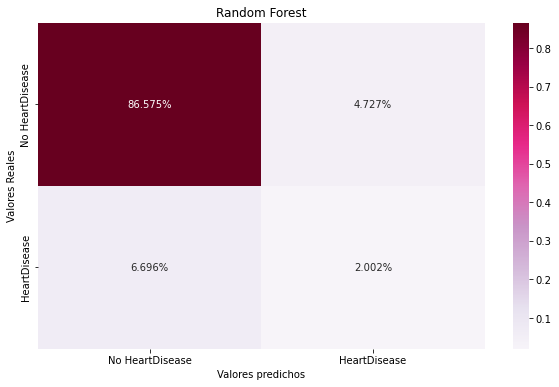

In [105]:
plt.figure(figsize=(10,6))
cm  = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.3%')

ax.set_title('Random Forest')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores Reales')
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

In [106]:
# Elaboracion de metricas
Ran_Forest_final = [accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]

AUC: 0.7810559175644406


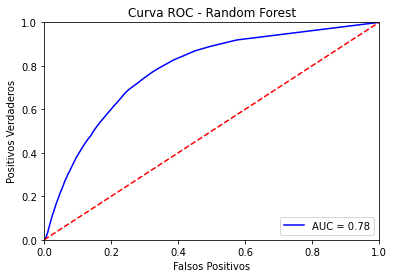

In [107]:
class_probabilities = random_forest.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

plt.title('Curva ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Positivos Verdaderos')
plt.xlabel('Falsos Positivos')
plt.show()

### 8.6 Adaptive Boosting

El modelo de Adaptive Boosting (adaboost), también trabaja con árboles de decisión. Probemos si podemos obtener mejores resultados.

In [108]:
#Creación del modelo
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.8)

model = ada.fit(X_train, y_train)

In [109]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7645780850274376
% de aciertos sobre el set de evaluación: 0.7537706250846893


In [110]:
# Elaboracion de metricas
Ada = [accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]

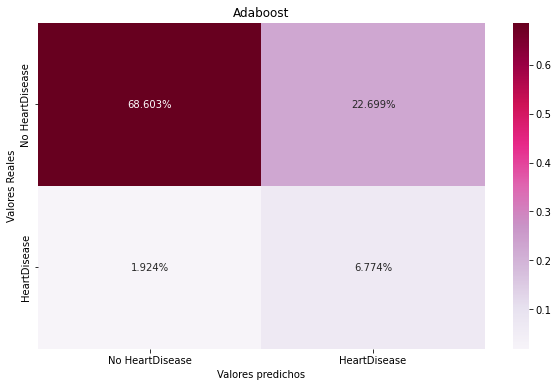

In [111]:
plt.figure(figsize=(10,6))
cm  = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.3%')

ax.set_title('Adaboost')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores Reales')
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

AUC: 0.8416339776549285


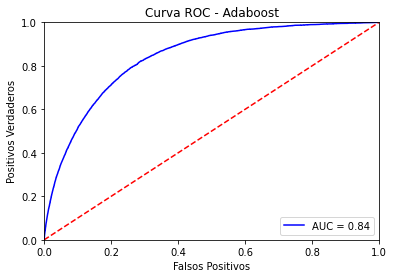

In [112]:
class_probabilities = ada.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

plt.title('Curva ROC - Adaboost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Positivos Verdaderos')
plt.xlabel('Falsos Positivos')
plt.show()

## 9. Evaluación final

Revisemos todas las métricas obtenidas inicialmente y las conseguidas después de intentar mejorar los modelos.

In [113]:
metricas = ["Accuracy", "Precision", "Recall", "Score F1"]

metrics_final = pd.DataFrame(index= metricas)
metrics_final["KNN"] = KNN
metrics_final["Arbol"] = Arbol
metrics_final["R_Forest"] = Ran_Forest
metrics_final["Arbol_final"] = Arbol_final
metrics_final["Adaboost"] = Ada
metrics_final["R_Forest_final"] = Ran_Forest_final
metrics_final.round(4)

,KNN,Arbol,R_Forest,Arbol_final,Adaboost,R_Forest_final
Accuracy,0.8334,0.7339,0.8871,0.7339,0.7538,0.8858
Precision,0.2053,0.1912,0.2996,0.1912,0.2298,0.2976
Recall,0.3186,0.6373,0.2231,0.6373,0.7788,0.2302
Score F1,0.2497,0.2941,0.2558,0.2941,0.3549,0.2596


💡 <font color="cb1155"> Como mencionamos anteriormente, nos interesa obtener un buen recall. Luego de la mejora de los datos y los modelos, podemos observar que el Adaboost nos da el mejor balance entre accuracy y recall. Aunque ningún modelo es totalmente bueno.

## 10. Conclusiones finales y mejoras futuras

### 10.1 Conclusiones
De primera mano nos parece necesario repasar algunos conceptos:

*	La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado.
*	La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar.
* Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.
*	El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

Teniendo en consideración que nuestra data se encuentra desbalanceada, creemos que el Accuracy no arroja resultados confiables ya que, si el modelo solo predice con un “NO”, ya obtendría un 90% de Accuracy. Y desde nuestro criterio, al tratarse de información referente al área de salud creemos sería menos erróneo que prediga “Yes” a casos de “Falsos Positivos (FP)”.
En referencia a nuestro modelo, sería mejor que el resultado sea que x paciente es propenso a tener problemas cardíacos a lo opuesto dado a que sería un error gravísimo al tratarse de salud.

Luego de comparar todos nuestros modelos, y centrándonos en el Recall, inferimos que los mejores resultados, en general, nos los da el Adaboost. Pero las métricas tampoco son tan buenas. En este sentido podríamos concluir que se requiere un mayor análisis de los datos para obtener mejores resultados o una muestra más grande.
También es importante considerar que la data utilizada podría no ser suficiente para armar un buen modelo predictivo de enfermedades cardiacas. Si revisamos la correlación de las variables con “HeartDisease”, podemos observar que ninguna de nuestras variables tiene una buena correlación con el target.
Y otro punto a tener en consideración, remitiéndonos al apartado 4. (Storytelling) es que desde el inicio caímos en cuenta de si bien la variable “Sex” del dataset contiene una muestra mayoritaria que hace referencia al género “Femenino”, los casos positivos se dieron en personas de género “Masculino”. En resumen, todo lo expuesto previamente reafirma los interrogantes propuestos con anterioridad y genera la duda de si entrenásemos los modelos con una muestra más amplia; ¿Los resultados serían diferentes?, ¿Se requeriría de todos modos entrenar otros modelos?, ¿Es una generalización pensar que usualmente la data que se encuentra en torno a la salud se encuentra desbalanceada?

### 10.2 Mejoras futuras
Algunas opciones que se podrían seguir intentando son:
* Probar otros modelos de predicción.
* Probar con Subsampling en vez de Oversampling.
* ¿Se obtendría una evaluación mejor si se utiliza el Score F2 en vez de F1?
* Conociendo ya los detalles de las variables; tal vez otra alternativa podría haber sido enriquecer el modelo con otro dataset que contenga una muestra que se complemente con la que ya tenemos; se nos ocurre por ejemplo (en el caso de que exista) y para emparejar los datos; enriquecer el modelo con otro dataset que contenga una muestra sólo de género masculino y de esta manera intentar hallar una aproximación de si el desbalance se debe a una relación sexo/género.